 This script is used to produce Suplementary Figures of the manuscript
'Plasmid-mediated phenotypic noise leads to transient antibiotic resistance in bacteria'.

MIT License

Copyright (c) 2023 JCRHB/RPM


## Supplementary Figure 3
### MGGT Fluorescense Distributions


## System preparation


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde
import scipy.stats as stats
import random


### Mounting Gdrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### File paths

In [3]:
rootDir="/content/drive/MyDrive/SYNC_Projects/"

rootDir=rootDir+"pBGT/GIT/"

workingDir=rootDir+"code/Supplementary/"
data_path=rootDir+"data/LB-AMP-LB/"
sfig_path=rootDir+"figures/SuppFigures/"


# Loading MGGT data

In [4]:
MGGT_file=data_path+"MGGT_LB-AMP-LB_AMNIS.csv"
MGGT_df=pd.read_csv(MGGT_file,sep="\t")
MGGT_dfbk=MGGT_df.copy()

MGGT_df.head()

,Object Number,Area_M01,Area_M02,Area_M04,Aspect Ratio_M01,Aspect Ratio_M02,Aspect Ratio_M04,Gradient RMS_M01_Ch01,Gradient RMS_M02_Ch02,Gradient RMS_M04_Ch04,Intensity_MC_Ch02,strain,season,treatment,replicate,dose number
0,0,0.0,55.222222,0.0,0.0,0.502838,0.0,0.0,20.293874,0.0,3574.465116,MGGT,1,LB,rep-1,2
1,1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,43.690217,MGGT,1,LB,rep-1,2
2,2,0.0,16.888889,0.0,0.0,0.698250,0.0,0.0,19.941072,0.0,1112.717391,MGGT,1,LB,rep-1,2
3,3,0.0,5.444444,0.0,0.0,0.664979,0.0,0.0,37.844659,0.0,569.486111,MGGT,1,LB,rep-1,2
4,4,0.0,14.666667,0.0,0.0,0.677321,0.0,0.0,28.464187,0.0,1919.706897,MGGT,1,LB,rep-1,2


[ 2  3  4  5  6  7  8  9 10 11 12]


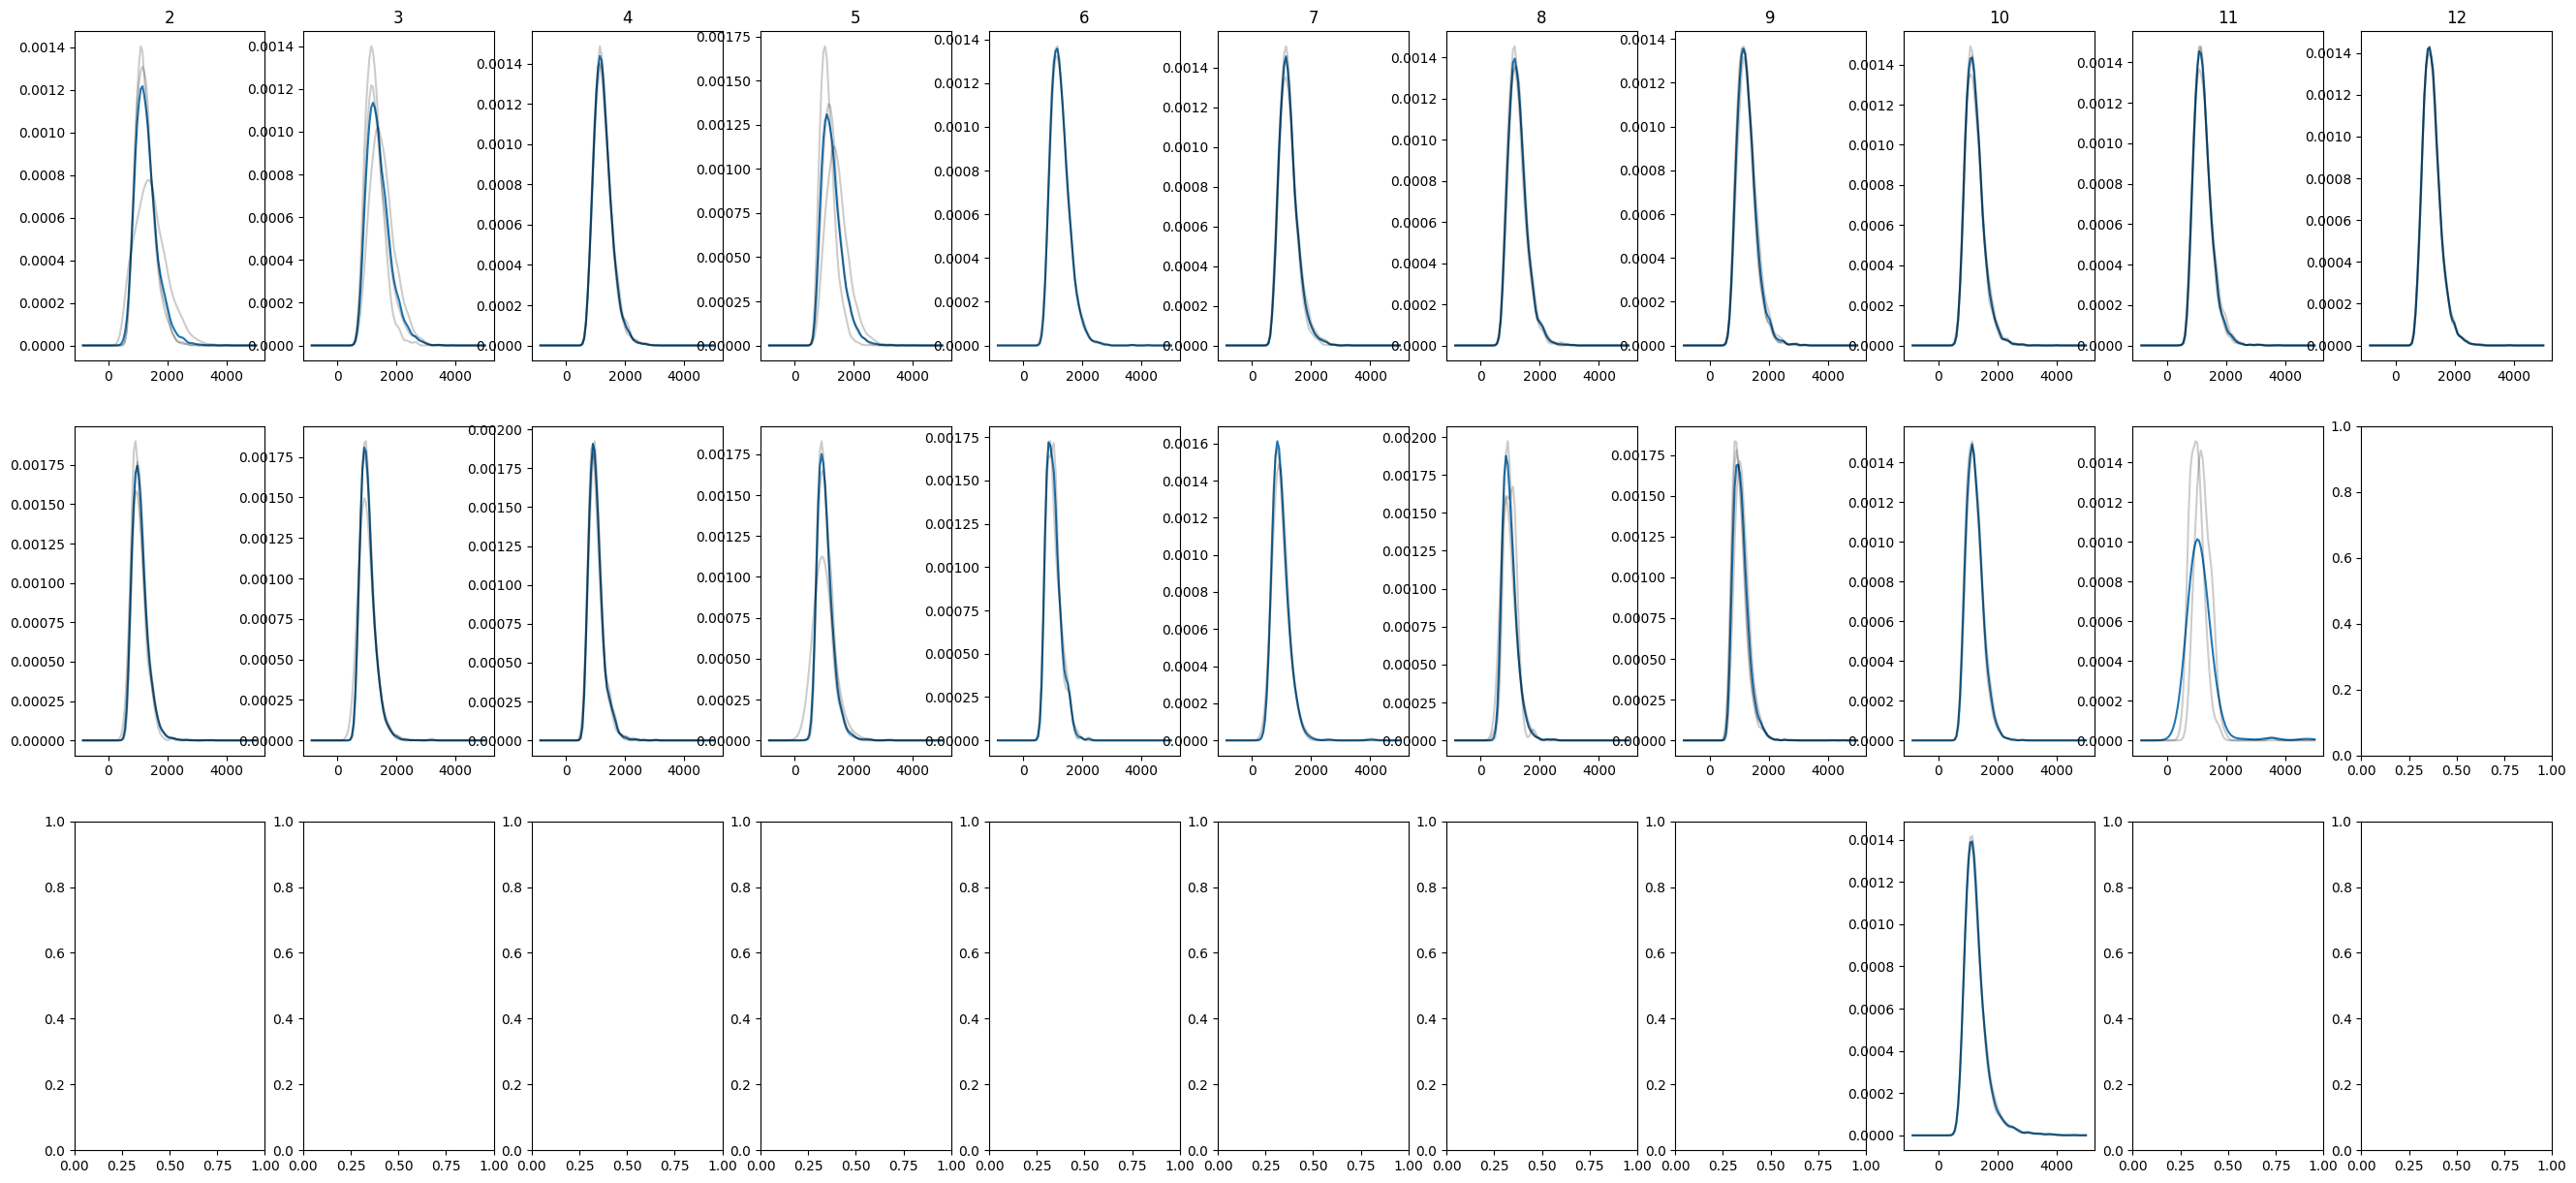

In [5]:


MGGT_df=MGGT_dfbk.copy()
cols=MGGT_df["dose number"].unique()
cols.sort()
print(cols)
rows=MGGT_df["season"].unique()
ncols=len(cols)
nrows=len(rows)

this_g=MGGT_df["Intensity_MC_Ch02"]
maxg=this_g.max()
ming=this_g.min()

maxg0=5e3


lim_aspect=[.4, .6];
lim_area=[5, 15];

MGGT_df=MGGT_df[(MGGT_df["Area_M02"]>lim_area[0])&(MGGT_df["Area_M02"]<lim_area[1])&
                (MGGT_df["Aspect Ratio_M02"]>lim_aspect[0])&(MGGT_df["Aspect Ratio_M02"]<lim_aspect[1])
                &(MGGT_df["Intensity_MC_Ch02"]<10000)
                #&(MGGT_df["Gradient RMS_M04_Ch04"]<1)
                &(MGGT_df["Gradient RMS_M02_Ch02"]>39)
                ]

xs=np.linspace(ming,maxg0,100)
fig,ax=plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*5))
for ic,col in enumerate(cols):
    col_df=MGGT_df[MGGT_df["dose number"]==col]
    ax[0,ic].set_title(col)
    for ir,row in enumerate(rows):
        row_df=col_df[col_df["season"]==row]
        this_gs=row_df["Intensity_MC_Ch02"]

        if(len(this_gs)==0):
            continue
        den=gaussian_kde(this_gs)
        ys=den(xs)
        ax[ir,ic].plot(xs,ys)
        reps=row_df["replicate"].unique()
        for rep in reps:
            t_df=row_df[row_df["replicate"]==rep]
            this_gs=t_df["Intensity_MC_Ch02"]
            #print(ic,ir,rep,len(this_gs))
            if(this_gs.size<50):
                continue
             #   print(ic,ir,rep,len(this_gs))
                #ax[ir,ic].set_xscale("log")
                maxg=this_g.max()
                maxg=1e6
                maxg=5000
                xs=np.linspace(ming,maxg,100)
            den=gaussian_kde(this_gs)
            ys=den(xs)
            ax[ir,ic].plot(xs,ys,c='k',alpha=.2)
            maxg=maxg0
            xs=np.linspace(ming,maxg,100)


plt.show()


#  sFig 3
### Plotting Fluorescence distributions for MGGT

0 2 4757 1058.7974348462906 241.0554029362822 0.22766904697996088
1 3 4459 1024.8107976167985 237.13136864839547 0.23139038854766694
2 4 2895 1016.8510460446275 233.38901583626193 0.2295213411483465
3 5 3314 1027.9409283077339 241.31387102425606 0.23475460931546263
4 6 638 1020.7975096477467 240.85621613799998 0.23594906321931938
5 7 826 966.7768769911163 238.82513578299358 0.24703232096974134
6 8 1464 973.4885492862788 224.91425279322834 0.23103944361556802
7 9 11043 1062.3985113603687 245.12883419792 0.2307315301901544
8 10 10390 1226.873297278364 259.32196301061884 0.21136816946451284
Skipped 9 11
Skipped 10 12


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Saving fig as: 
 /content/drive/MyDrive/SYNC_Projects/pBGT/GIT/figures/SuppFigures/sFig-3.pdf


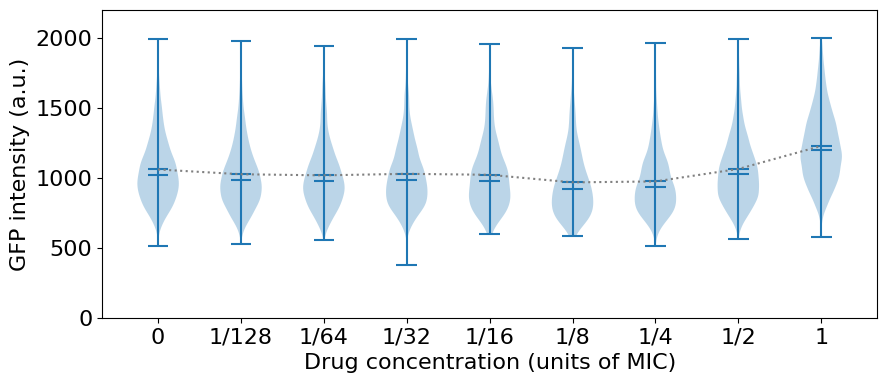

In [7]:
MGGT_Doses=['0', '1/128', '1/64', '1/32', '1/16','1/8','1/4','1/2','1'];
#MGGT_df=MGGT_dfbk.copy()

#lim_aspect=[.25, .75];   #<for amp
#lim_area=[5, 12];


ming=100
maxg=2e3

yy=[]
mggt_means=[]
xs=np.linspace(ming,maxg,1000)
poss=[]

row_df=MGGT_df[MGGT_df["season"]==2]
for ic,col in enumerate(cols):
    col_df=row_df[row_df["dose number"]==col]


    col_df=col_df[(col_df["Intensity_MC_Ch02"]<maxg)&(col_df["Intensity_MC_Ch02"]>ming)]

    this_gs=list(col_df["Intensity_MC_Ch02"])
    this_mean=np.mean(this_gs)
    #if(len(this_gs)<50):
    if(col>10):
        print("Skipped",ic,col)
        continue
    poss.append(ic)
    this_sd=np.std(this_gs)
    this_cv=this_sd/this_mean
    yy.append(this_gs)
    mggt_means.append(this_mean)
    print(ic,col,len(this_gs),this_mean,this_sd,this_cv)




fig=plt.figure(figsize=(10,4))
fig.set_facecolor('white')
plt.rcParams.update({'font.size': 16})

plt.violinplot(yy,positions=poss,showmeans=True,showmedians=True)
plt.plot(poss,mggt_means,ls=':',c='gray')
plt.ylim([0,2200])
plt.ylabel("GFP intensity (a.u.)")#,fontweight='bold')
plt.xlabel("Drug concentration (units of MIC)")#,fontweight='bold')
plt.xticks(poss,labels=MGGT_Doses)



out_fig_name=sfig_path+"sFig-3.pdf"
print("Saving fig as: \n",out_fig_name)
plt.savefig(out_fig_name,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()